In [1]:
# -----------------------------
# 1️⃣ Importing necessary libraries
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# -----------------------------
# 2️⃣ Load the dataset
# -----------------------------
df=pd.read_csv('framingham.csv')

In [3]:
# Display first 5 rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Check shape of the dataset
df.shape

(4240, 16)

In [5]:
# Get info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
# Descriptive statistics
df.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


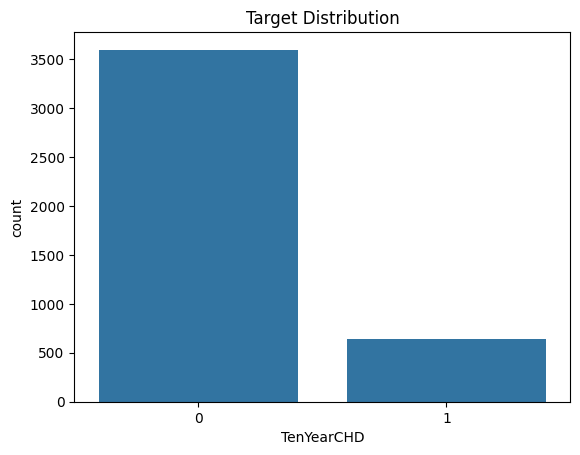

In [7]:
# -----------------------------
# Visualize the distribution of the target variable
# 'TenYearCHD' is the target for classification in the original dataset
# This plot shows how many samples belong to each class (0 and 1)

sns.countplot(x="TenYearCHD", data=df)
plt.title("Target Distribution")
plt.show()


In [8]:
# -----------------------------
# 3️⃣ Handle missing values
# -----------------------------

from sklearn.impute import SimpleImputer

# Select numeric columns
num_cols = df.select_dtypes(include=["float64","int64"]).columns

# Fill missing values with median
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])


In [9]:
# Verify there are no missing values
df.isnull().sum()


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [10]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

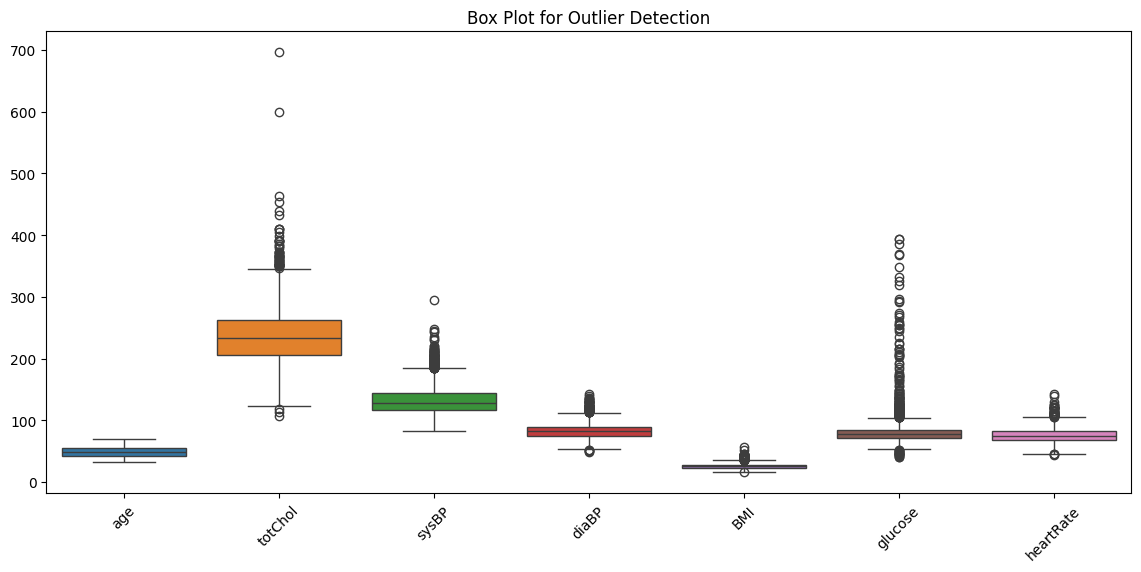

In [11]:
# -----------------------------
# 4️⃣ Outlier detection and handling
# -----------------------------

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age','totChol','sysBP','diaBP','BMI','glucose','heartRate']

# Boxplot to detect outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.show()


In [12]:
# Clip outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

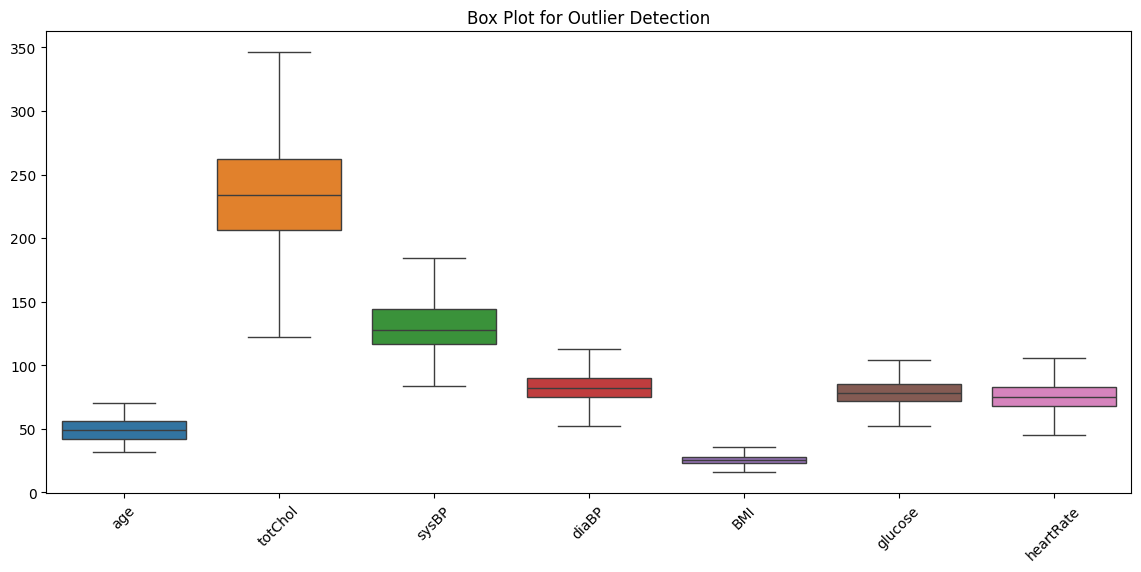

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age','totChol','sysBP','diaBP','BMI','glucose','heartRate']

# Boxplot after clipping outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.show()


In [14]:
x = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]


In [15]:
# -----------------------------
# Split the dataset into training and test sets
# -----------------------------
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
# -----------------------------
# Feature Scaling using StandardScaler
# -----------------------------

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
# This standardizes features by removing the mean and scaling to unit variance
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler (do not fit again)
x_test_scaled = scaler.transform(x_test)


In [18]:
# -----------------------------
# 6️⃣ Train/Test Split
# -----------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)


In [19]:
# -----------------------------
# 7️⃣ Feature Scaling
# -----------------------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
from google.colab import files

df.to_csv("/content/cleaned_data.csv", index=False)
files.download("/content/cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
!ls /content


cleaned_data.csv  framingham.csv  sample_data
